# Walmart Sales Forecasting (Baseline Model)

**Objective (English):**  
Build a baseline Machine Learning model to forecast Walmart’s weekly sales using engineered features.  
The workflow includes:  
- Load processed dataset (`walmart_features_weekly.csv`)  
- Split data into train/test sets by time (2010–2011 = train, 2012 = test)  
- Train an XGBoost regressor  
- Evaluate predictions using RMSE and MAPE  
- Visualize actual vs. predicted values  

**วัตถุประสงค์ (ภาษาไทย):**  
สร้างโมเดล Machine Learning พื้นฐาน (Baseline Model) เพื่อพยากรณ์ยอดขายรายสัปดาห์ของ Walmart โดยใช้ฟีเจอร์ที่ผ่านการทำ Feature Engineering แล้ว  
ขั้นตอนประกอบด้วย:  
- โหลดชุดข้อมูลที่เตรียมไว้ (`walmart_features_weekly.csv`)  
- แบ่งข้อมูลเป็น train/test ตามช่วงเวลา (2010–2011 = train, 2012 = test)  
- เทรนโมเดล XGBoost สำหรับการทำนายยอดขาย  
- ประเมินผลด้วย RMSE และ MAPE  
- แสดงกราฟเปรียบเทียบค่าจริงกับค่าที่โมเดลทำนาย  


### 1. Load Dataset & Train/Test Split (โหลดข้อมูลและแบ่งชุดเทรน/เทส)

**ภาษาไทย:**  
โหลดชุดข้อมูลที่ผ่านการ Feature Engineering (`walmart_features_weekly.csv`)  
แล้วทำการแบ่งข้อมูลตามเวลา โดยกำหนดให้ข้อมูลก่อนปี 2012 เป็นชุดเทรน และหลังปี 2012 เป็นชุดเทส  
จากนั้นแยกตัวแปรเป้าหมาย (`Target`) ออกจากตัวแปรฟีเจอร์ พร้อมตรวจสอบขนาดของชุดข้อมูล

**English:**  
Load the processed dataset (`walmart_features_weekly.csv`) that contains engineered features.  
The data is split by time: before 2012 → training set, from 2012 onwards → test set.  
We separate the target variable (`Target`) from the features and verify the dataset shape.


In [1]:
import pandas as pd
from pathlib import Path
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

data_path = Path(r"S:\BusinessAnalyticProject\data\processed\walmart_features_weekly.csv")
df = pd.read_csv(data_path, parse_dates=['Date'])

# split ตามเวลา: train = 2010–2011, test = 2012
split_date = pd.Timestamp('2012-01-01')
train = df[df['Date'] < split_date].copy()
test  = df[df['Date'] >= split_date].copy()

target_col = 'Target'
id_cols = ['Store','Date','Weekly_Sales','Weekly_Sales_Real']

feature_cols = [c for c in df.columns if c not in id_cols + [target_col]]

X_train, y_train = train[feature_cols], train[target_col]
X_test,  y_test  = test[feature_cols],  test[target_col]

X_train.shape, X_test.shape


((2160, 24), (1890, 24))

### 2. Train Baseline Model with XGBoost (สร้างโมเดลพื้นฐานด้วย XGBoost)

**ภาษาไทย:**  
ใช้โมเดล `XGBRegressor` เพื่อทำนายยอดขายรายสัปดาห์ โดยกำหนดค่า hyperparameters เช่น  
- `n_estimators=500` (จำนวนต้นไม้)  
- `max_depth=6` (ความลึกของต้นไม้)  
- `learning_rate=0.05` (อัตราการเรียนรู้)  

จากนั้นเทรนโมเดลด้วยชุดเทรน และทดสอบกับชุดเทส พร้อมประเมินด้วย  
- RMSE (Root Mean Squared Error)  
- MAPE (Mean Absolute Percentage Error)

**English:**  
We use `XGBRegressor` as the baseline model to forecast weekly sales.  
Hyperparameters include `n_estimators=500`, `max_depth=6`, and `learning_rate=0.05`.  
The model is trained on the training set and evaluated on the test set using:  
- RMSE (Root Mean Squared Error)  
- MAPE (Mean Absolute Percentage Error)


In [3]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

model = XGBRegressor(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    tree_method="hist"
)
model.fit(X_train, y_train)

mse  = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)  # เอารากที่สองเอง
mape = mean_absolute_percentage_error(y_test, pred)

print(f"RMSE: {rmse:,.0f}")
print(f"MAPE: {mape*100:.2f}%")


RMSE: 97,804
MAPE: 6.40%


## 3. Visualization: Actual vs Predicted (การเปรียบเทียบค่าจริงกับค่าที่ทำนาย)

**English:**  
We plot the actual weekly sales (blue) against the model’s predicted values (orange) for the first 100 samples.  
This visualization helps us evaluate how closely the model follows the real sales trends and identify any under- or over-predictions.  

**ภาษาไทย:**  
เราสร้างกราฟเปรียบเทียบระหว่างยอดขายจริง (สีน้ำเงิน) และค่าที่โมเดลทำนาย (สีส้ม) สำหรับ 100 ตัวอย่างแรก  
กราฟนี้ช่วยให้เราประเมินว่าโมเดลสามารถจับแนวโน้มยอดขายจริงได้ใกล้เคียงแค่ไหน และตรวจสอบว่ามีการทำนายสูงเกินไปหรือต่ำเกินไปหรือไม่  


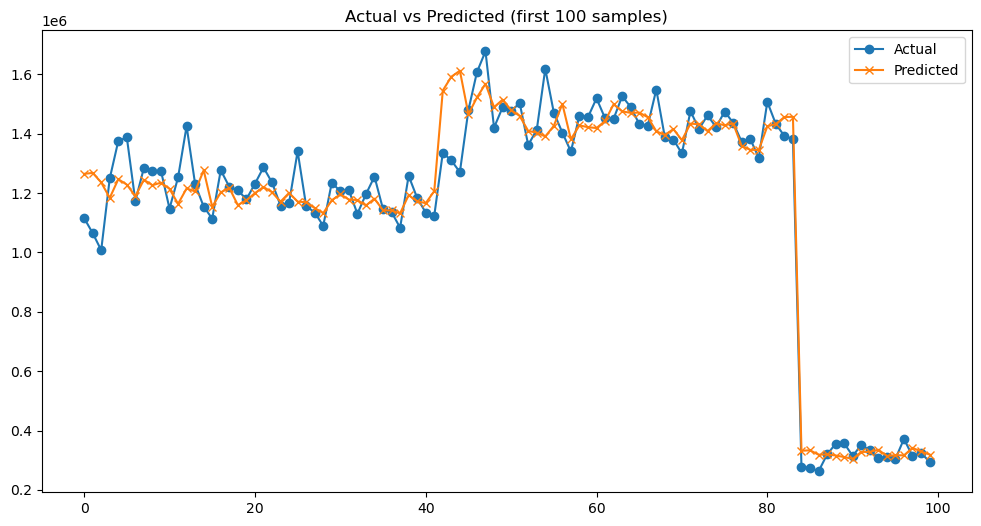

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.values[:100], label="Actual", marker='o')
plt.plot(pred[:100], label="Predicted", marker='x')
plt.title("Actual vs Predicted (first 100 samples)")
plt.legend()
plt.show()


## 5. Feature Importance Analysis (การวิเคราะห์ความสำคัญของฟีเจอร์)

**English:**  
We extracted feature importances from the trained XGBoost model and visualized the top 15 features.  
This helps us understand which variables contribute most to the model’s predictions.  
For example, features like `Store_avg_to_date` and rolling averages of weekly sales (`Weekly_Sales_Real_rollmean8`, `Weekly_Sales_Real_rollmean4`) are among the strongest predictors of future sales.  

**ภาษาไทย:**  
เราแยกค่าความสำคัญของฟีเจอร์ (feature importances) จากโมเดล XGBoost ที่เทรนแล้ว และแสดงผล 15 ฟีเจอร์ที่สำคัญที่สุด  
สิ่งนี้ช่วยให้เราเข้าใจว่าตัวแปรใดมีผลต่อการทำนายของโมเดลมากที่สุด  
เช่น ฟีเจอร์ `Store_avg_to_date` และค่าเฉลี่ยเคลื่อนที่ของยอดขายรายสัปดาห์ (`Weekly_Sales_Real_rollmean8`, `Weekly_Sales_Real_rollmean4`) เป็นตัวบ่งชี้ที่มีอิทธิพลสูงต่อการพยากรณ์ยอดขาย  


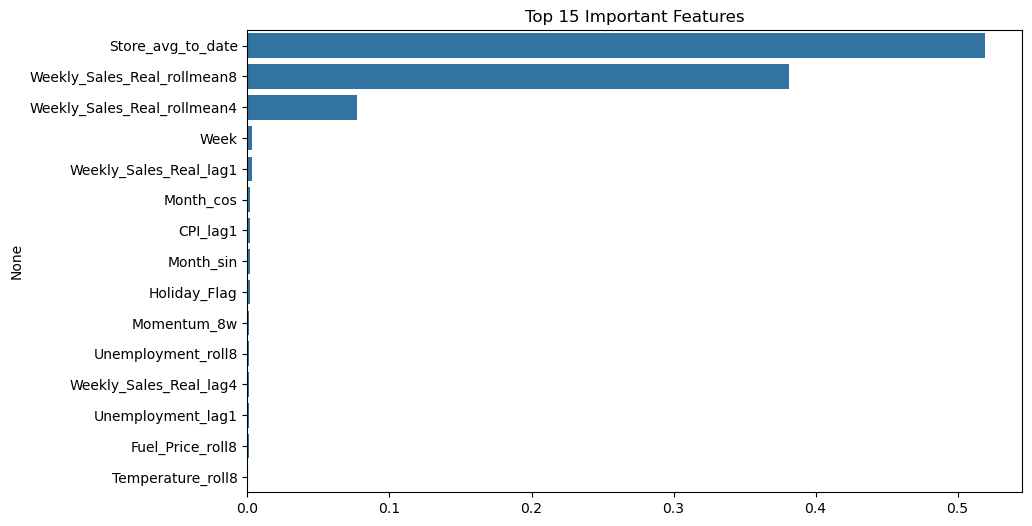

In [5]:
import pandas as pd
import seaborn as sns

importance = model.feature_importances_
feat_imp = pd.Series(importance, index=feature_cols).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values[:15], y=feat_imp.index[:15])
plt.title("Top 15 Important Features")
plt.show()


## Conclusion (สรุปผล)

**English:**  
We developed a baseline forecasting model for Walmart’s weekly sales using XGBoost.  
The model achieved good performance with an RMSE of approximately **97,804** and MAPE of **6.40%**, meaning the predictions were on average within ~6% of the actual sales.  
Visualization of actual vs predicted values showed that the model successfully captured the overall sales trends, although it missed some extreme fluctuations.  
Feature importance analysis revealed that historical rolling averages (`Weekly_Sales_Real_rollmean8`, `Weekly_Sales_Real_rollmean4`) and store-level averages (`Store_avg_to_date`) were the strongest predictors.  
This baseline provides a strong foundation for further model improvements such as hyperparameter tuning, adding more external features, or trying alternative algorithms.

**ภาษาไทย:**  
เราได้สร้างโมเดลพื้นฐาน (baseline model) สำหรับการพยากรณ์ยอดขายรายสัปดาห์ของ Walmart โดยใช้ XGBoost  
โมเดลมีประสิทธิภาพที่ดี โดยได้ค่า RMSE ประมาณ **97,804** และค่า MAPE เท่ากับ **6.40%** ซึ่งหมายความว่าผลการพยากรณ์คลาดเคลื่อนเฉลี่ยเพียง ~6% เมื่อเทียบกับยอดขายจริง  
จากกราฟเปรียบเทียบค่า Actual vs Predicted พบว่า โมเดลสามารถจับแนวโน้มยอดขายหลัก ๆ ได้ แต่ยังพลาดบางช่วงที่มีความผันผวนสูง  
ผลการวิเคราะห์ความสำคัญของฟีเจอร์แสดงให้เห็นว่าค่าเฉลี่ยเคลื่อนที่ในอดีต (`Weekly_Sales_Real_rollmean8`, `Weekly_Sales_Real_rollmean4`) และค่าเฉลี่ยรายร้าน (`Store_avg_to_date`) เป็นตัวแปรที่สำคัญที่สุด  
โมเดล baseline นี้เป็นจุดเริ่มต้นที่แข็งแรงสำหรับการพัฒนาต่อ เช่น ปรับค่า hyperparameter, เพิ่มฟีเจอร์ภายนอกเพิ่มเติม หรือทดลองใช้โมเดลอื่น ๆ  
